# Imports and Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = 'dataset/train.csv'

In [3]:
df = pd.read_csv(train_path)

# Data Cleaning

In [4]:
df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [5]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [6]:
df.shape

(9021, 98)

In [7]:
df.dtypes

date_id                            int64
D1                                 int64
D2                                 int64
D3                                 int64
D4                                 int64
                                  ...   
V8                               float64
V9                               float64
forward_returns                  float64
risk_free_rate                   float64
market_forward_excess_returns    float64
Length: 98, dtype: object

In [8]:
df.isnull().sum()

date_id                             0
D1                                  0
D2                                  0
D3                                  0
D4                                  0
                                 ... 
V8                               1006
V9                               4539
forward_returns                     0
risk_free_rate                      0
market_forward_excess_returns       0
Length: 98, dtype: int64

In [9]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct[missing_pct > 0]

E7     77.253076
V10    67.054650
S3     63.551713
M1     61.489857
M13    61.412260
         ...    
I7     11.151757
I6     11.151757
I5     11.151757
I4     11.151757
V3     11.151757
Length: 85, dtype: float64

In [10]:
feature_prefixes = ['M', 'E', 'I', 'P', 'V', 'S', 'MOM', 'D']
feature_counts = {}

for prefix in feature_prefixes:
    cols = [col for col in df.columns if col.startswith(prefix)]
    feature_counts[prefix] = len(cols)

feature_counts

{'M': 18, 'E': 20, 'I': 9, 'P': 13, 'V': 13, 'S': 12, 'MOM': 0, 'D': 9}

In [11]:
df['market_forward_excess_returns'].describe()

count    9021.000000
mean        0.000053
std         0.010558
min        -0.040582
25%        -0.004747
50%         0.000255
75%         0.005479
max         0.040551
Name: market_forward_excess_returns, dtype: float64

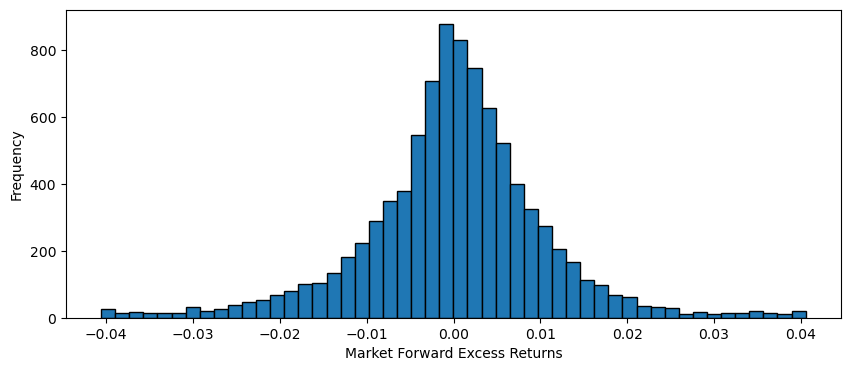

In [12]:
plt.figure(figsize=(10, 4))
plt.hist(df['market_forward_excess_returns'], bins=50, edgecolor='black')
plt.xlabel('Market Forward Excess Returns')
plt.ylabel('Frequency')
plt.show()

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corrwith(df['market_forward_excess_returns']).sort_values(ascending=False)
correlations.head(20)

market_forward_excess_returns    1.000000
forward_returns                  0.999943
V13                              0.062395
M1                               0.046111
S5                               0.040010
D2                               0.033946
D1                               0.033946
M2                               0.033238
V10                              0.032635
V7                               0.031484
S12                              0.026134
D8                               0.024786
M17                              0.024591
E19                              0.023503
S6                               0.022029
M3                               0.017107
D4                               0.016943
V9                               0.016662
D5                               0.016611
D6                               0.016600
dtype: float64

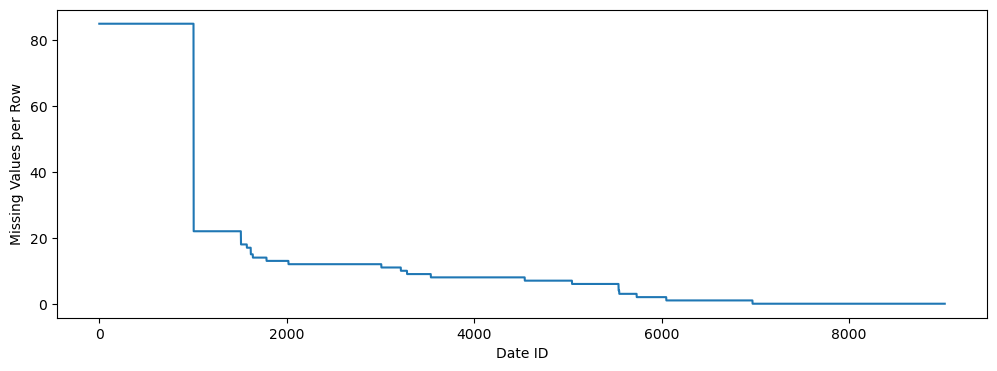

In [14]:
missing_by_date = df.isnull().sum(axis=1)
plt.figure(figsize=(12, 4))
plt.plot(df['date_id'], missing_by_date)
plt.xlabel('Date ID')
plt.ylabel('Missing Values per Row')
plt.show()

In [15]:
for cutoff in range(1001, 1010, 1):
    df_temp = df[df['date_id'] >= cutoff]
    max_missing = df_temp.isnull().sum(axis=1).max()
    print(f"Cutoff {cutoff}: {len(df_temp)} rows, max missing: {max_missing}")

Cutoff 1001: 8020 rows, max missing: 85
Cutoff 1002: 8019 rows, max missing: 85
Cutoff 1003: 8018 rows, max missing: 85
Cutoff 1004: 8017 rows, max missing: 85
Cutoff 1005: 8016 rows, max missing: 85
Cutoff 1006: 8015 rows, max missing: 22
Cutoff 1007: 8014 rows, max missing: 22
Cutoff 1008: 8013 rows, max missing: 22
Cutoff 1009: 8012 rows, max missing: 22


In [16]:
cutoff = 1006
df_clean = df[df['date_id'] >= cutoff].copy()
print(f"Cutoff {cutoff}: {len(df_clean)} rows")
print(f"Shape: {df_clean.shape}")
print(f"\nMissing values per column:")
print((df_clean.isnull().sum() / len(df_clean) * 100).sort_values(ascending=False).head(15))

Cutoff 1006: 8015 rows
Shape: (8015, 98)

Missing values per column:
E7     74.398004
V10    62.919526
S3     58.976918
M1     56.656269
M14    56.568933
M13    56.568933
M6     50.368060
V9     44.079850
S12    31.578291
M5     28.409233
M2     27.585777
S8     24.990643
M3     12.626326
E1      9.706800
P6      7.885215
dtype: float64


In [17]:
df_clean = df.copy()

feature_cols = [col for col in df.columns if col not in ['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']]

df_clean[feature_cols] = df_clean[feature_cols].bfill().ffill()

In [18]:
print(df_clean.isnull().sum().sum())
print(df_clean.shape)
df_clean.head()

0
(9021, 98)


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,0.970899,0.986111,-0.24456,0.000661,-1.11604,0.000661,0.717031,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,0.970899,0.986111,-0.24456,0.000661,-1.11604,0.000661,0.717031,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,0.970899,0.986111,-0.24456,0.000661,-1.11604,0.000661,0.717031,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,0.970899,0.986111,-0.24456,0.000661,-1.11604,0.000661,0.717031,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,0.970899,0.986111,-0.24456,0.000661,-1.11604,0.000661,0.717031,-0.011686,0.000299,-0.012301


In [19]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
correlations = df_clean[numeric_cols].corrwith(df_clean['market_forward_excess_returns']).abs().sort_values(ascending=False)
print(correlations.head(20))

market_forward_excess_returns    1.000000
forward_returns                  0.999943
M4                               0.064669
V13                              0.057467
S5                               0.038463
S2                               0.036002
D1                               0.033946
D2                               0.033946
E11                              0.030277
V7                               0.029209
E12                              0.029038
P8                               0.029012
D8                               0.024786
M17                              0.024036
E19                              0.023263
P12                              0.022191
P5                               0.022109
S6                               0.021750
S12                              0.021328
I2                               0.021112
dtype: float64


In [20]:
feature_groups = {
    'Market': [col for col in df_clean.columns if col.startswith('M')],
    'Economic': [col for col in df_clean.columns if col.startswith('E')],
    'Interest': [col for col in df_clean.columns if col.startswith('I')],
    'Price': [col for col in df_clean.columns if col.startswith('P')],
    'Volatility': [col for col in df_clean.columns if col.startswith('V')],
    'Sentiment': [col for col in df_clean.columns if col.startswith('S')]
}

for name, cols in feature_groups.items():
    print(f"{name}: {len(cols)} features")

Market: 18 features
Economic: 20 features
Interest: 9 features
Price: 13 features
Volatility: 13 features
Sentiment: 12 features


In [22]:
df_clean.to_csv('dataset/train_cleaned', index=False)

# Feature Engineering